In [12]:
from sklearn.svm import SVC
from sklearn.kernel_ridge import KernelRidge
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score,
    RocCurveDisplay,
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    explained_variance_score,
)
import matplotlib.pyplot as plt
import numpy as np

In [13]:
iris = load_iris()
X = iris.data
y = iris.target

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.3, random_state=42)

In [16]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
svm = SVC(kernel='linear', C=1.0, probability=True)
svm.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [24]:
y_pred = svm.predict(X_test)

In [14]:
mask = (y==0) | (y==1)
X = X[mask]
y = y[mask]

In [25]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        31

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70



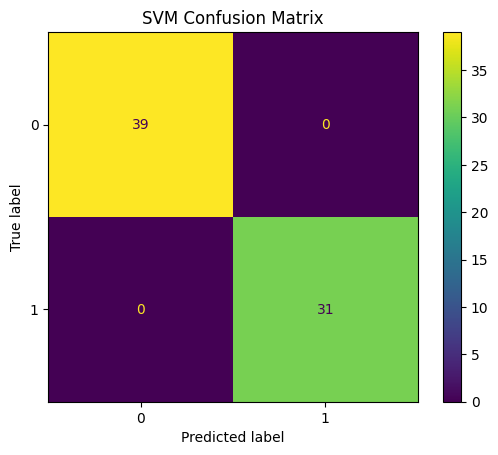

In [26]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('SVM Confusion Matrix')
plt.show()

In [27]:
y_probs = svm.predict_proba(X_test)[:,1]

In [28]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

In [29]:
auc = roc_auc_score(y_test, y_probs)

In [30]:
print(f"AUC: {auc}")

AUC: 1.0


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_plot/roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


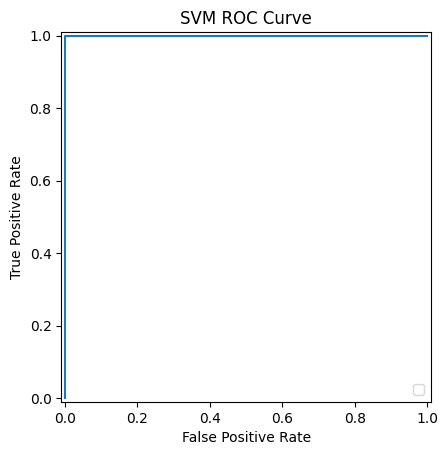

In [31]:
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.title('SVM ROC Curve')
plt.show()